 ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            1
   Constants    :            0
   Variables    :            4
   Intermediates:            0
   Connections  :            4
   Equations    :            0
   Residuals    :            0
 
 Number of state variables:             80
 Number of total equations: -           80
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 solver            3  not supported
 using default solver: APOPT
 ----------------------------------------------
 Dynamic Simulation with APOPT Solver
 ----------------------------------------------
 
 Iter    Objective  Convergence
    0  1.28786E-34  7.26918E+00
    1  1.28786E-34  7.26918E+00
 Successful s

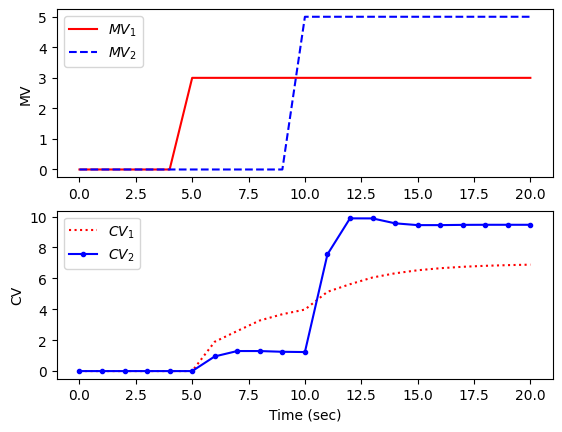

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

na = 2 # Number of A coefficients
nb = 1 # Number of B coefficients
ny = 2 # Number of outputs
nu = 2 # Number of inputs

# A (na x ny)
A = np.array([[0.36788,0.36788],\
              [0.223,-0.136]])
# B (ny x (nb x nu))
B1 = np.array([0.63212,0.18964]).T
B2 = np.array([0.31606,1.26420]).T
B = np.array([[B1],[B2]])

C = np.array([0,0])

# create parameter dictionary
# parameter dictionary p['a'], p['b'], p['c']
# a (coefficients for a polynomial, na x ny)
# b (coefficients for b polynomial, ny x (nb x nu))
# c (coefficients for output bias, ny)
p = {'a':A,'b':B,'c':C}

# Create GEKKO model
m = GEKKO(remote=False)

# Build GEKKO ARX model
y,u = m.arx(p)

# load inputs
tf = 20 # final time
u1 = np.zeros(tf+1)
u2 = u1.copy()
u1[5:] = 3.0
u2[10:] = 5.0
u[0].value = u1
u[1].value = u2

# customize names
mv1 = u[0]
mv2 = u[1]
cv1 = y[0]
cv2 = y[1]

# options
m.time = np.linspace(0,tf,tf+1)
m.options.imode = 4
m.options.nodes = 2

# simulate
m.solve()

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time,mv1.value,'r-',label=r'$MV_1$')
plt.plot(m.time,mv2.value,'b--',label=r'$MV_2$')
plt.ylabel('MV')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.plot(m.time,cv1.value,'r:',label=r'$CV_1$')
plt.plot(m.time,cv2.value,'b.-',label=r'$CV_2$')
plt.ylabel('CV')
plt.xlabel('Time (sec)')
plt.legend(loc='best')
plt.show()